In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
mnist= fetch_openml('mnist_784',as_frame=False)
X= mnist.data
Y= mnist.target
t_sne= TSNE(n_components=2,init="random")
X_reduced = t_sne.fit_transform(X)

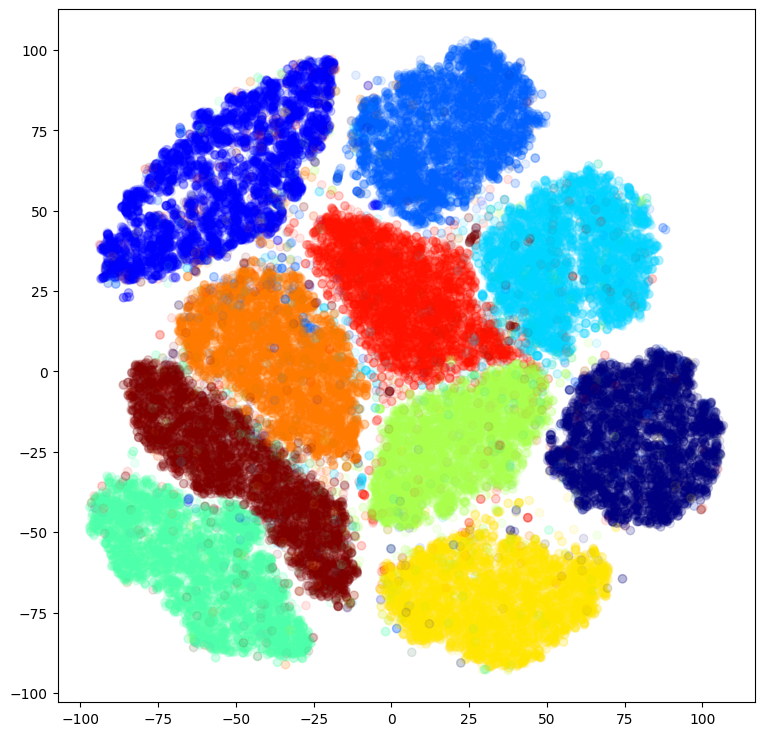

In [11]:
plt.figure(figsize=(9,9))
plt.scatter(X_reduced[:,0],X_reduced[:,1],cmap="jet",c=Y.astype(np.int8),alpha=0.1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox,OffsetImage
scaelr=MinMaxScaler()
def plot_images(X,Y,min_space=0.1,images=None,figsize=(13,10)):
    X_normal= scaelr.fit_transform(X)
    neighbors=np.array([[10,10]]) #initialized to overlap distance
    plt.figure(figsize=figsize)
    digits = np.unique(Y) #getting unique labels
    #plotting the digits individually
    cmap=plt.cm.jet
    for digit in digits:
        plt.scatter(X_normal[Y==digit,0],X_normal[Y==digit,1],c=[cmap(float(digit)/9)],alpha=0.2)
        ax = plt.gca()
        for index,coord in enumerate(X_normal):
            closest= np.linalg.norm(neighbors-coord,axis=1).min()
            if closest>min_space:
                neighbors=np.r_[neighbors,[coord]]
                if images is None:
                    plt.text(coord[0],coord[1],str(Y[index]),color=cmap(int(Y[index])/9),fontdict={"size":16})
                else:
                    image=images[index].reshape(28,28)
                    imagebox=AnnotationBbox(OffsetImage(image,cmap="binary"),coord)
                    ax.add_artist(imagebox)




ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 479.

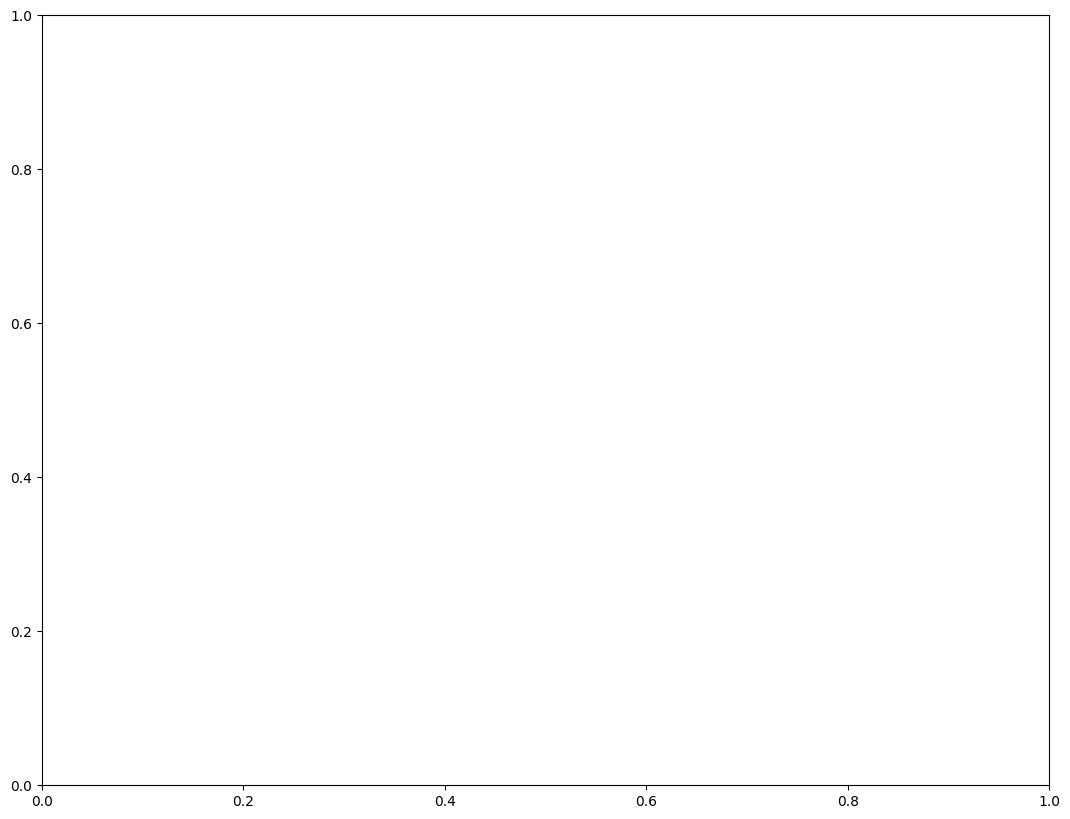

In [50]:
Xplot,Yplot,imageplot=X_reduced[:5000],Y[:5000],X[:5000]
#without images
plot_images(Xplot,Yplot)

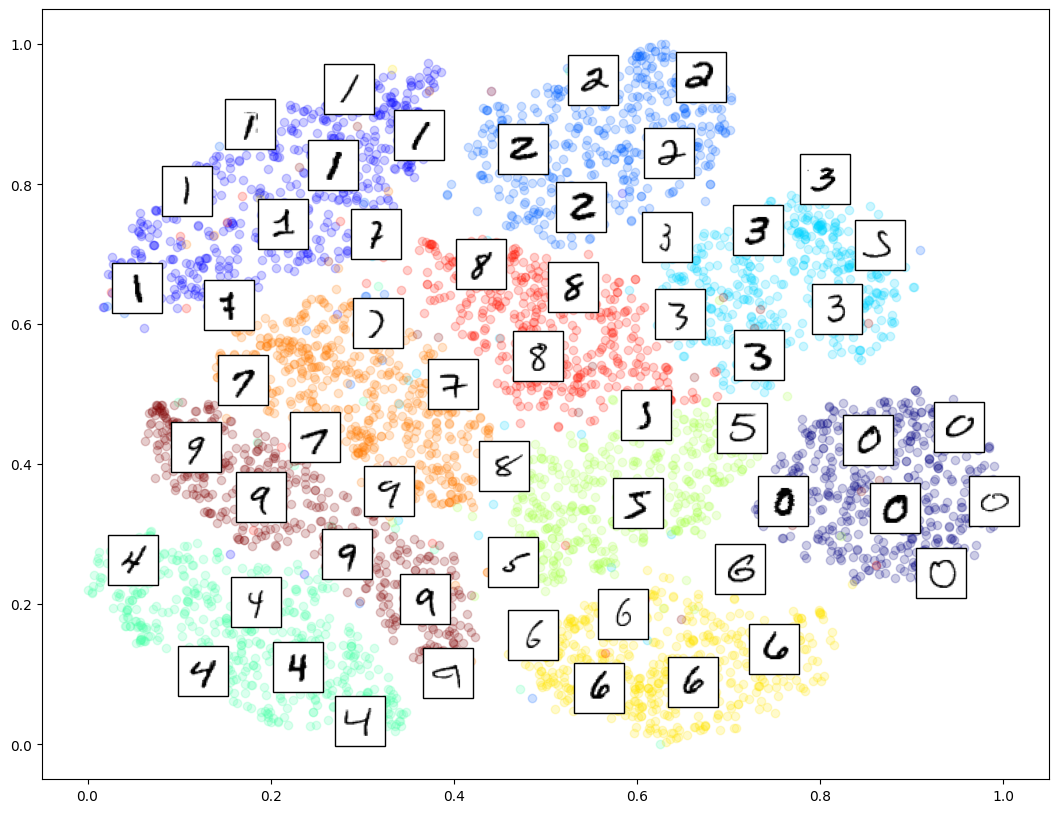

In [43]:
#with Images
plot_images(Xplot,Yplot,images=imageplot)